# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

## NOTE: first we want to know what we are dealing with, so load the images and get sizes
Use torchvision from transfer_learning exercise (and mentor help) to get the data
Note you can't see the /data/landmark_images/ from your local workspace (half an hour of trying to figure out what was going on)

So we first just want to know are we dealing with 28x28, 280x280 or 2800x2800 images

## After some iterations, old torch versions don't have tensors, subsetrandomsampler, etc so we load the latest version of torch
### mean you must first run this !python update of torch, torchvision and THEN restart kernel and the run of the script

### Only reason I loaded torch 1.9 was because of mentor notes on using SubsetRandomSampler and it didn't seem to work without version 1.9 and installing torchvision after it.

## BE PATIENT: it takes a LONG time

In [2]:
##!python -m pip install python==3.6
!python -m pip install torch==1.9
!python -m pip install torchvision

    100% |████████████████████████████████| 831.4MB 56kB/s  eta 0:00:01    15% |█████                           | 130.7MB 46.3MB/s eta 0:00:16    36% |███████████▊                    | 305.4MB 23.2MB/s eta 0:00:23    46% |███████████████                 | 388.0MB 47.2MB/s eta 0:00:10██████         | 598.3MB 46.3MB/s eta 0:00:06�█████████████▊        | 615.8MB 48.9MB/s eta 0:00:0522.8MB 49.0MB/s eta 0:00:05    | 656.1MB 42.7MB/s eta 0:00:05  | 658.5MB 42.0MB/s eta 0:00:05  | 660.9MB 50.8MB/s eta 0:00:04  | 665.7MB 43.0MB/s eta 0:00:04█████████▉      | 670.0MB 46.1MB/s eta 0:00:04:00:04██      | 674.9MB 47.1MB/s eta 0:00:04/s eta 0:00:04�███████▏     | 680.0MB 50.5MB/s eta 0:00:03|██████████████████████████▎     | 682.4MB 44.7MB/s eta 0:00:04███▎     | 684.1MB 27.8MB/s eta 0:00:06█▍     | 686.0MB 27.4MB/s eta 0:00:06    83% |██████████████████████████▋     | 691.7MB 54.0MB/s eta 0:00:03████████     | 699.3MB 42.1MB/s eta 0:00:04��█████     | 701.6MB 42.8MB/s eta 0:00:04██████████████████

In [1]:
import torch
torch.__version__


'1.9.0+cu102'

In [2]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
#from torchvision import datasets
#import torchvision
#import torch
#NOTE: previously tried to load ./images/train but an examination of that directory showed exactly one image
train_data = torchvision.datasets.folder.ImageFolder('/data/landmark_images/train')
#train_data = datasets.folder.ImageFolder('/data/landmark_images/train')

In [3]:
len(train_data)

4996

In [3]:
train_data[0]


(<PIL.Image.Image image mode=RGB size=600x800 at 0x7F2E88DFCB00>, 0)

In [4]:
train_data[-1]

(<PIL.Image.Image image mode=RGB size=800x575 at 0x7F2E0FD3FB70>, 49)

In [5]:
print(dir(torch.utils.data))

['BatchSampler', 'ChainDataset', 'ConcatDataset', 'DataLoader', 'Dataset', 'DistributedSampler', 'IterDataPipe', 'IterableDataset', 'RandomSampler', 'Sampler', 'SequentialSampler', 'Subset', 'SubsetRandomSampler', 'TensorDataset', 'WeightedRandomSampler', '_DatasetKind', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_decorator', '_typing', '_utils', 'argument_validation', 'dataloader', 'datapipes', 'dataset', 'distributed', 'functional_datapipe', 'get_worker_info', 'guaranteed_datapipes_determinism', 'non_deterministic', 'random_split', 'runtime_validation', 'runtime_validation_disabled', 'sampler']


## NOTE: 
Given the above two samples and a quick look at the data, they are not small thumbnail images and probably require a signficant portion of the image (> half) in order to have a hope to identifying landmarks. As such we'll probably start with a pretty large portion of the above two images, say 512x512 crop. Given the distributed nature of many of the landmarks, we'll probably want a number of possible transforms, including crop, rotate, and normalize, etc

In [6]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#from torchvision import datasets, models, transforms
import torch
from torchvision import datasets, transforms
#from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np

# NOTE: 9/17: trying to run model ran out of memory, so changing things we think my affect things
#crop_size = 512
crop_size = 256
nworkers = 0
#batch_size = 50 # about 1/100 of the train data set
batch_size = 20 # about 1/250 of the train data set
valid_size = 0.2 # 20% for validation
rand_rot = 10.0

#NOTE: 9/11/2021: want to crop the data to a standard size; choose centercrop 
#  because landmark probably near center, do random rotations,and normalize
# Possible add ColorJitter, blurring
transform_train = transforms.Compose([
    transforms.RandomCrop(crop_size,pad_if_needed=True),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])
# NOTE: 9/11: need a different transform, mainly dropping any image randomization but keeping grab, totensor, normalize
transform_test = transforms.Compose([
    transforms.RandomCrop(crop_size,pad_if_needed=True),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])


# load data
#NOTE: 9/11: grab the basic datasets, train and test
train_data = torchvision.datasets.folder.ImageFolder('/data/landmark_images/train',transform=transform_train)
test_data  = torchvision.datasets.folder.ImageFolder('/data/landmark_images/test', transform=transform_test)

# now deal with valid dataset, a subset of train
# total length of the train data
num_train = len(train_data)
# put ordered list of indices in idx_rtrain, which we'll randomize
idx_rtrain = list(range(num_train))
# now shuffle indices of idx
np.random.shuffle(idx_rtrain)
vsplit = int(np.floor(num_train * valid_size))

# so now we have randomized idx values split between train and valid
train_idx, valid_idx = idx_rtrain[vsplit:], idx_rtrain[:vsplit]
# This comes from the mentor notes
# this comes from:
#https://discuss.pytorch.org/t/using-imagefolder-random-split-with-multiple-transforms/79899/2
#traindata = Subset(traindataset, indices=train_idx)
#valdata = Subset(valdataset, indices=valid_idx)
#testdata = Subset(testdataset, indices=test_idx)

#train_samp, valid_samp = torch.utils.data.Subset(train_data,indices=train_idx), torch.utils.data.Subset(train_data,indices=valid_idx)
#train_samp = torch.utils.data.Subset(train_data,indices=train_idx) 
#valid_samp = torch.utils.data.Subset(train_data,indices=valid_idx)
train_samp = torch.utils.data.SubsetRandomSampler(train_idx) 
valid_samp = torch.utils.data.SubsetRandomSampler(valid_idx)
#train_samp, valid_samp = torch.utils.data.SubsetRandomSampler(train_idx), torch.utils.data.SubsetRandomSampler(valid_idx)
#train_samp, valid_samp = SubsetRandomSampler(train_idx), SubsetRandomSampler(valid_idx)

# dataloaders
#train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_samp)
#valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_samp)
#test_loader  = torch.utils.data.DataLoader(test_data,  batch_size=batch_size)
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_samp)
valid_loader = DataLoader(train_data, batch_size=batch_size, sampler=valid_samp)
test_loader  = DataLoader(test_data,  batch_size=batch_size)



loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

Describe your chosen procedure for preprocessing the data. 
### My approach was to first determine the approximate size of my images with the print statements above of the first and last in the training set. I also downloaded the .zip file to look at a couple of the images and saw that at least in some of the images the landmark took up a major portion of the images. 

- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
### Based on this look, it appeared that an 512x512 image would probably be appropriate. If we run into problems (image too small) I'll probably have to pad out to 512 or further reduce the size appropriately.  Could also Resize the images for greater randomness

### Next I decided to do a random crop of the images but to pad if needed as the landmark could take up a significant portion of the images and often centrally located. Could have also done a centercrop as well. 

- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
### Next, after reviewing the different transforms available, I decided that certain transforms wouldn't be appropriate such as horizontal or vertical flipping as landmarks tended to be unique in that perspective, but others could be considered, including RandomRotation, Normalize, RandomPerspective, ColorJitter, GaussianBlur, etc. Of these we initially selected RandomRotation and Normalize, mainly because we understood completely what t would do with the images and that these transforms would be realistic as actual augmentated images, but will revisit this if we have trouble meeting our performance requirements.


### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [7]:
print(train_data.classes)

['00.Haleakala_National_Park', '01.Mount_Rainier_National_Park', '02.Ljubljana_Castle', '03.Dead_Sea', '04.Wroclaws_Dwarves', '05.London_Olympic_Stadium', '06.Niagara_Falls', '07.Stonehenge', '08.Grand_Canyon', '09.Golden_Gate_Bridge', '10.Edinburgh_Castle', '11.Mount_Rushmore_National_Memorial', '12.Kantanagar_Temple', '13.Yellowstone_National_Park', '14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower', '17.Changdeokgung', '18.Delicate_Arch', '19.Vienna_City_Hall', '20.Matterhorn', '21.Taj_Mahal', '22.Moscow_Raceway', '23.Externsteine', '24.Soreq_Cave', '25.Banff_National_Park', '26.Pont_du_Gard', '27.Seattle_Japanese_Garden', '28.Sydney_Harbour_Bridge', '29.Petronas_Towers', '30.Brooklyn_Bridge', '31.Washington_Monument', '32.Hanging_Temple', '33.Sydney_Opera_House', '34.Great_Barrier_Reef', '35.Monumento_a_la_Revolucion', '36.Badlands_National_Park', '37.Atomium', '38.Forth_Bridge', '39.Gateway_of_India', '40.Stockholm_City_Hall', '41.Machu_Picchu', '42.Death_Valley_National_Pa

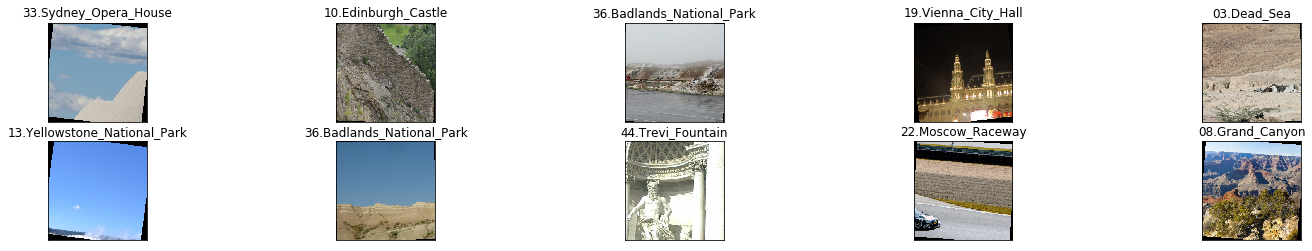

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader
# NOTE 9/11: using the example from visualizing a batch of data from the MNIST dataset exersize
# Also the cifar10_cnn_augmentation lesson
# first a helper function to handle the images
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    plt.imshow(np.transpose(img,(1,2,0)))

it_images = iter(train_loader)
images, labels = it_images.next()
images = images.numpy()

classes = train_data.classes

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
fig = plt.figure(figsize=(25,4))
num_fig = 10 # 5 is our minimum set, take a peak at 2 rows
nrow = 2
nrow_fig = num_fig / nrow
for idx in np.arange(num_fig):
    ax = fig.add_subplot(nrow, nrow_fig, idx+1, xticks=[], yticks=[])
#    https://stackoverflow.com/questions/51906144/pytorch-image-label
    # NOTE we take the default color map...
    imshow(images[idx])
    ax.set_title(classes[labels[idx].item()])




### Initialize use_cuda variable

In [9]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

In [10]:
if use_cuda:
    print('USING CUDA!')

USING CUDA!


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [11]:
## TODO: select loss function
#NOTE: try cifar10_cnn loss function of crossentropy
import torch.optim as optim
#import torch.nn as nn

criterion_scratch = torch.nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    #NOTE: Not sure what is meant by select an optimizer, 
    return optim.SGD(model.parameters(),lr=0.01)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
#NOTE: 9/11 these are our adjustable values for our network
import torch.nn.functional as F

d=3
c1_k = 3
c2_k = 3
c3_k = 3
#c1_d = 64
#c2_d = 128
#c3_d = 256
c1_d = 32
c2_d = 64
c3_d = 128
mp1=8
mps1=8
mp=2
mps=2
fc1 = 100
fc2 = 100
fc3 = 50
c1_p = int((c1_k-1)/2)
c2_p = int((c2_k-1)/2)
c3_p = int((c3_k-1)/2)

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        # NOTE: start with crop_size x crop_size and assume pool each layer
        
        # crop_size x crop_size x c1_d => crop_size/mps1 x crop_size/mps1 x c1_d
        self.conv1 = nn.Conv2d(d,    c1_d, c1_k, padding=c1_p)
        # crop_size/mp1 x crop_size/mp1 x c1_d => crop_size/(mps1*mps) x crop_size/(mps1*mps) x c2_d
        self.conv2 = nn.Conv2d(c1_d, c2_d, c2_k, padding=c2_p)
        # crop_size/(mps1*mps) x crop_size/(mps1*mps) x c2_d => crop_size/(mps1*mps*mps) x crop_size/(mps1*mps*mps) x c3_d
        self.conv3 = nn.Conv2d(c2_d, c3_d, c3_k, padding=c3_p)
        # NOTE: to greatly reduce the initial size of our large images, we'll do a large pooling first then smaller values
        self.pool1 = nn.MaxPool2d(mp1, mps1)
        self.poolx = nn.MaxPool2d(mp, mps)
        self.fc1_in = int(crop_size * crop_size /(mps1*mps*mps*mps1*mps*mps)) * c3_d

        # fully connected layer
        self.fc1 = nn.Linear(self.fc1_in, fc1)
        self.fc2 = nn.Linear(fc1,    fc2)
        self.fc3 = nn.Linear(fc2,    fc3)
        self.dropout = nn.Dropout(0.25)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.poolx(F.relu(self.conv2(x)))
        x = self.poolx(F.relu(self.conv3(x)))
        
        x = x.view(-1,self.fc1_in)
        
        x = self.dropout(x)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        #NOTE: 9/11 don't understand/remmeber why we don't softmax the return....

        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
## NOTE: Again followed the cifar10_cnn_augmentation to provide a start. These were much smaller (32x32) than our current images (512x512) so we'll want conv layers that are also more detailed initially and work our way down. We note that the cifar had 3 CNNs, a maxpool and a couple of fc layers. In the transfer learning exercise we borrowed from the VGGnet which had 5 sets of 2 and 3 convolutional layers and then 3 fc layers. However this took a very long time to train

## Thus we plan at least a 3 CNN followed by a 3 FC layers, with the intial layers pretty deep. We also (try) a larger kernel(=8) with deep conv layers followed by smaller, more typical maxpool kernels(=3) to see if we can't capture the overall landscape in the large kernel and the fine features in the small. 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        print('Start Epoch before train batches: {} '.format(
            epoch
            ))
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                if batch_idx % 250 == 1:
                    print('Using CUDA training, batch:',batch_idx)
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            #NOTE: 9/11 borrow from cifar10 again....
            
            #clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass, compute predicted outputs from model
            output = model(data)
            # determine batch loss between output and target
            loss = criterion(output, target)
            # backward pass, compute gradient of the loss wrt model parameters
            loss.backward()
            # perform single opt step (parameter upd)
            optimizer.step()
            
            # NOTE: 9/11: update the training loss, trying their suggestion
            # previously was train_loss = train_loss + loss.data.item()*data.size[0]
            # note we are now normalizing the current loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            if batch_idx % 50 == 0:
                print('Epoch: {} \tbatch_idx: {} \tRunning Training Loss: {:.6f} '.format(
                    epoch, batch_idx,
                    train_loss
                    ))
            
        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                if batch_idx % 50 == 1:
                    print('Using CUDA valid, batch:',batch_idx)
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            #NOTE 9/11: using cifar10 again, we have forward pass: compute predicted outputs by passing inputs to model
            output = model(data)
            # calcualte batch loss
            loss = criterion(output, target)
            # update average validation loss, based on above expression (hopefully)....
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss)) 
            if batch_idx % 50 == 0:
                print('Epoch: {} \tbatch_idx: {} \tRunning Valid Loss: {:.6f} '.format(
                    epoch, batch_idx,
                    valid_loss
                    ))


            
        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(valid_loader.dataset)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} -> {:.6f} ). Saving model....'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    print('!!! FINISHED !!!!')    
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [14]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    # NOTE: 9/17: use previous lessons on style transfer and its custom weights here
# REF: https://stackoverflow.com/questions/51125856/custom-weight-initialization-in-pytorch   
# based on our weights initialization lesson (in turn from #https://pytorch.org/docs/stable/nn.init.html)
    classname = m.__class__.__name__

    if classname.find('Linear') != -1:
        n = m.in_features
        if n > 0:
            y = 1.0/np.sqrt(n)
        else:
            y = 1.0 # same as if n = 1        
        m.weight.data.normal_(mean=0.0, std=y)
        m.bias.data.fill_(0)
    elif classname.find('BatchNorm') != -1:
        n = m.in_features
        if n > 0:
            y = 1.0/np.sqrt(n)
        else:
            y = 1.0 # same as if n = 1        
        m.weight.data.normal_(mean=0.0, std=y)
        m.bias.data.fill_(0)    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
#model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
#                      criterion_scratch, use_cuda, 'ignore.pt')
model_scratch = train(2, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Start Epoch before train batches: 1 


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	batch_idx: 0 	Running Training Loss: 3.893920 
Using CUDA training, batch: 1
Epoch: 1 	batch_idx: 50 	Running Training Loss: 3.910297 
Epoch: 1 	batch_idx: 100 	Running Training Loss: 3.911410 
Epoch: 1 	batch_idx: 150 	Running Training Loss: 3.911570 
Epoch: 1 	batch_idx: 0 	Running Valid Loss: 3.919497 
Using CUDA valid, batch: 1
Epoch: 1 	Training Loss: 0.000783 	Validation Loss: 0.000783
Validation loss decreased (inf -> 0.000783 ). Saving model....
Start Epoch before train batches: 2 
Epoch: 2 	batch_idx: 0 	Running Training Loss: 3.917304 
Using CUDA training, batch: 1
Epoch: 2 	batch_idx: 50 	Running Training Loss: 3.910391 
Epoch: 2 	batch_idx: 100 	Running Training Loss: 3.911551 
Epoch: 2 	batch_idx: 150 	Running Training Loss: 3.910695 
Epoch: 2 	batch_idx: 0 	Running Valid Loss: 3.899381 
Using CUDA valid, batch: 1
Epoch: 2 	Training Loss: 0.000783 	Validation Loss: 0.000782
Validation loss decreased (0.000783 -> 0.000782 ). Saving model....
!!! FINISHED !!!!


### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [15]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
#num_epochs = 100
#num_epochs = 20
num_epochs = 2

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Start Epoch before train batches: 1 
Epoch: 1 	batch_idx: 0 	Running Training Loss: 3.889349 
Using CUDA training, batch: 1
Epoch: 1 	batch_idx: 50 	Running Training Loss: 3.911727 
Epoch: 1 	batch_idx: 100 	Running Training Loss: 3.914110 
Epoch: 1 	batch_idx: 150 	Running Training Loss: 3.913904 
Epoch: 1 	batch_idx: 0 	Running Valid Loss: 3.933741 
Using CUDA valid, batch: 1
Epoch: 1 	Training Loss: 0.000783 	Validation Loss: 0.000784
Validation loss decreased (inf -> 0.000784 ). Saving model....
Start Epoch before train batches: 2 
Epoch: 2 	batch_idx: 0 	Running Training Loss: 3.908753 
Using CUDA training, batch: 1
Epoch: 2 	batch_idx: 50 	Running Training Loss: 3.912835 
Epoch: 2 	batch_idx: 100 	Running Training Loss: 3.911225 
Epoch: 2 	batch_idx: 150 	Running Training Loss: 3.912633 
Epoch: 2 	batch_idx: 0 	Running Valid Loss: 3.922380 
Using CUDA valid, batch: 1
Epoch: 2 	Training Loss: 0.000783 	Validation Loss: 0.000783
Validation loss decreased (0.000784 -> 0.000783 ). Sa

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [1]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_scratch.state_dict():
    print(param_tensor, "\t", model_scratch.state_dict()[param_tensor].size())

## Print optimizer's state_dict
#print("Optimizer's state_dict:")
#for var_name in optimizer.state_dict():
#    print(var_name, "\t", optimizer.state_dict()[var_name])

model_scratch.load_state_dict(torch.load('model_scratch.pt'))

NameError: name 'model_scratch' is not defined

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

RuntimeError: Please look up dimensions by name, got: name = None.

---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = {'train': None, 'valid': None, 'test': None}





### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [ ]:
## TODO: select loss function
criterion_transfer = None


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [ ]:
## TODO: Specify model architecture

model_transfer = None




#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'



#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [ ]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

In [ ]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions

    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

